<a href="https://colab.research.google.com/github/yeshitha-kuppireddy/orangequalityprediction/blob/main/orangequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link to the dataset: https://www.kaggle.com/datasets/shruthiiiee/orange-quality

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data=pd.read_csv('//content/drive/My Drive/orangequality.csv')
#data=pd.read_csv('/content/Orange Quality Data.csv')
data.tail()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0
240,7.3,282,10.5,2.9,4.0,21,2.0,Orange-Red,Jaffa,Y (Minor),4.0


In [ ]:
min(data['HarvestTime (days)'])

4

# **Preprocessing**

In [ ]:
data.drop_duplicates()
data.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

# Label Encoding

In [ ]:
data['Color'].unique()

array(['Orange', 'Deep Orange', 'Light Orange', 'Orange-Red',
       'Yellow-Orange'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
category_mapping1={'Orange':3, 'Deep Orange':4, 'Light Orange':2, 'Orange-Red':5,'Yellow-Orange':1}
categories = data['Color']
categories
data['Color'] = [category_mapping1[cat] for cat in categories]


In [ ]:
data['Blemishes (Y/N)'].unique()

array(['N', 'Y (Minor)', 'Y (Sunburn)', 'Y (Mold Spot)', 'Y (Bruise)',
       'Y (Split Skin)', 'Y (Sunburn Patch)', 'Y (Scars)',
       'Y (Minor Insect Damage)', 'Y (Bruising)', 'N (Minor)',
       'N (Split Skin)'], dtype=object)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Variety']= label_encoder.fit_transform(data['Variety'])

In [ ]:
x='Tangerine'
x=label_encoder.transform([x])
x[0]

20

In [ ]:
from sklearn.preprocessing import LabelEncoder
category_mapping={'N':0, 'Y (Minor)':3, 'Y (Sunburn)':4, 'Y (Mold Spot)':9, 'Y (Bruise)':7,
       'Y (Split Skin)':10, 'Y (Sunburn Patch)':5, 'Y (Scars)':8,
       'Y (Minor Insect Damage)':11, 'Y (Bruising)':6, 'N (Minor)':1,
       'N (Split Skin)':2}
categories = data['Blemishes (Y/N)']
categories
data['Blemishes (Y/N)'] = [category_mapping[cat] for cat in categories]


# checking for outliers

Text(0.5, 1.0, 'Ripeness (1-5)')

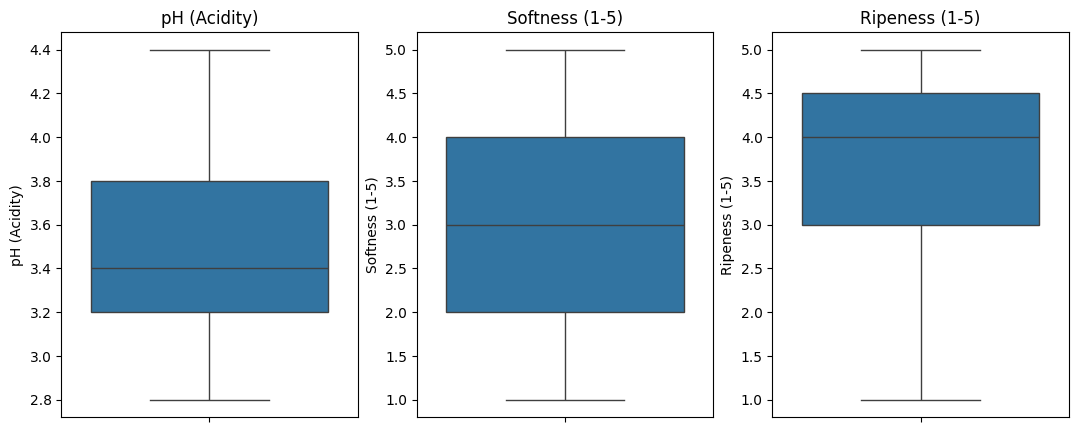

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
sns.boxplot(ax=axes[0], data=data['pH (Acidity)']).set_title('pH (Acidity)')
sns.boxplot(ax=axes[1], data=data['Softness (1-5)']).set_title('Softness (1-5)')
sns.boxplot(ax=axes[2], data=data['Ripeness (1-5)']).set_title('Ripeness (1-5)')

In [ ]:
x=data[['Size (cm)',	'Weight (g)',	'Brix (Sweetness)',	'pH (Acidity)',	'Softness (1-5)',	'HarvestTime (days)',	'Ripeness (1-5)',	'Color',	'Variety',	'Blemishes (Y/N)']]
y=data['Quality (1-5)']

# splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# standardizaton

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Simple regression models

In [ ]:
dataf={'model_name':[],'r_2 score':[],'mse':[],'rmse':[],'mae':[],'msle':[],'evs':[]}
metrics=pd.DataFrame(dataf)


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,explained_variance_score,mean_squared_log_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

regressors=[['Linear Regression :',LinearRegression()],
       ['lasso',Lasso(alpha=0.1)],
       ['ridge',Ridge(alpha=0.1)],
       ['XGBRegressor',xgb.XGBRegressor()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Ada Boosting Regression :',AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()]]
for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    mse=mean_squared_error(y_test, predictions)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    evs=explained_variance_score(y_test,predictions)
    mae = mean_absolute_error(y_test, predictions)
    msle=mean_squared_log_error(y_test,predictions)
    r2=r2_score(y_test,predictions)
    print(name,r2_score(y_test,predictions))
    metrics.loc[len(metrics)] =[name,r2,mse,rms,mae,msle,evs]



In [ ]:
metrics

# bagging with bootstrap

In [ ]:
from sklearn.ensemble import BaggingRegressor
bagging_regressor = BaggingRegressor(base_estimator=LinearRegression(),n_estimators=10,bootstrap=True,random_state=3)
bagging_regressor.fit(X_train, y_train)
predictions = bagging_regressor.predict(X_test)
r2_score(y_test,predictions)
mse=mean_squared_error(y_test, predictions)
rms=np.sqrt(mean_squared_error(y_test, predictions))
evs=explained_variance_score(y_test,predictions)
mae = mean_absolute_error(y_test, predictions)
msle=mean_squared_log_error(y_test,predictions)
r2=r2_score(y_test,predictions)
name='bagging with bootstrap'
metrics.loc[len(metrics)] =[name,r2,mse,rms,mae,msle,evs]

# voting with best 3,5,7,9 regressors

In [ ]:
from sklearn.ensemble import VotingRegressor
voting_rg3 = VotingRegressor(estimators=[('linear', LinearRegression()), ('KNeighborsRegressor', KNeighborsRegressor()), ('Support Vector Regression',SVR())])
voting_rg3.fit(X_train,y_train)
predictions = voting_rg3.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rms=np.sqrt(mean_squared_error(y_test, predictions))
evs=explained_variance_score(y_test,predictions)
mae = mean_absolute_error(y_test, predictions)
msle=mean_squared_log_error(y_test,predictions)
r2=r2_score(y_test,predictions)
name='voting with best 3'
metrics.loc[len(metrics)] =[name,r2,mse,rms,mae,msle,evs]
r2_score(y_test,predictions)
predictions

In [ ]:
from sklearn.ensemble import VotingRegressor
voting_rg5 = VotingRegressor(estimators=[('linear', LinearRegression()), ('KNeighborsRegressor', KNeighborsRegressor()), ('Support Vector Regression',SVR()),('Lasso',Lasso(alpha=0.1)),('ridge',Ridge(alpha=0.1))])
voting_rg5.fit(X_train,y_train)
predictions = voting_rg5.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rms=np.sqrt(mean_squared_error(y_test, predictions))
evs=explained_variance_score(y_test,predictions)
mae = mean_absolute_error(y_test, predictions)
msle=mean_squared_log_error(y_test,predictions)
r2=r2_score(y_test,predictions)
name='voting with best 5'
metrics.loc[len(metrics)] =[name,r2,mse,rms,mae,msle,evs]
r2_score(y_test,predictions)

In [ ]:
from sklearn.ensemble import VotingRegressor
voting_rg7 = VotingRegressor(estimators=[('linear', LinearRegression()), ('KNeighborsRegressor', KNeighborsRegressor()), ('Support Vector Regression',SVR()),('Lasso',Lasso(alpha=0.1)),('ridge',Ridge(alpha=0.1)),('GradientBoostingRegressor',GradientBoostingRegressor()),('ExtraTreesRegressor',ExtraTreesRegressor())])
voting_rg7.fit(X_train,y_train)
predictions = voting_rg7.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rms=np.sqrt(mean_squared_error(y_test, predictions))
evs=explained_variance_score(y_test,predictions)
mae = mean_absolute_error(y_test, predictions)
msle=mean_squared_log_error(y_test,predictions)
r2=r2_score(y_test,predictions)
name='voting with best 7'
metrics.loc[len(metrics)] =[name,r2,mse,rms,mae,msle,evs]
r2_score(y_test,predictions)

In [ ]:
from sklearn.ensemble import VotingRegressor
voting_rg9 = VotingRegressor(estimators=[('linear', LinearRegression()), ('KNeighborsRegressor', KNeighborsRegressor()), ('Support Vector Regression',SVR()),('Lasso',Lasso(alpha=0.1)),('ridge',Ridge(alpha=0.1)),('GradientBoostingRegressor',GradientBoostingRegressor()),('ExtraTreesRegressor',ExtraTreesRegressor()),('xgb.XGBRegressor',xgb.XGBRegressor()),('RandomForestRegressor',RandomForestRegressor())])
voting_rg9.fit(X_train,y_train)
predictions= voting_rg9.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rms=np.sqrt(mean_squared_error(y_test, predictions))
evs=explained_variance_score(y_test,predictions)
mae = mean_absolute_error(y_test, predictions)
msle=mean_squared_log_error(y_test,predictions)
r2=r2_score(y_test,predictions)
name='voting with best 9'
metrics.loc[len(metrics)] =[name,r2,mse,rms,mae,msle,evs]
r2_score(y_test,predictions)

# stacking with best 3,5,7,9 regressors

In [ ]:
from sklearn.ensemble import StackingRegressor
stacking_rg3 = StackingRegressor(estimators=[('linear', LinearRegression()), ('KNeighborsRegressor', KNeighborsRegressor()), ('Support Vector Regression',SVR())],final_estimator=KNeighborsRegressor())
stacking_rg3.fit(X_train,y_train)
predictions = stacking_rg3.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rms=np.sqrt(mean_squared_error(y_test, predictions))
evs=explained_variance_score(y_test,predictions)
mae = mean_absolute_error(y_test, predictions)
msle=mean_squared_log_error(y_test,predictions)
r2=r2_score(y_test,predictions)
name='stacking with best 3'
metrics.loc[len(metrics)] =[name,r2,mse,rms,mae,msle,evs]
r2_score(y_test,predictions)

In [ ]:
from sklearn.ensemble import StackingRegressor
stacking_rg5 = StackingRegressor(estimators=[('linear', LinearRegression()), ('KNeighborsRegressor', KNeighborsRegressor()), ('Support Vector Regression',SVR()),('Lasso',Lasso(alpha=0.1)),('ridge',Ridge(alpha=0.1))],final_estimator=KNeighborsRegressor())
stacking_rg5.fit(X_train,y_train)
predictions = stacking_rg5.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rms=np.sqrt(mean_squared_error(y_test, predictions))
evs=explained_variance_score(y_test,predictions)
mae = mean_absolute_error(y_test, predictions)
msle=mean_squared_log_error(y_test,predictions)
r2=r2_score(y_test,predictions)
name='stacking with best 5'
metrics.loc[len(metrics)] =[name,r2,mse,rms,mae,msle,evs]
r2_score(y_test,predictions)

In [ ]:
from sklearn.ensemble import StackingRegressor
stacking_rg7 = StackingRegressor(estimators=[('linear', LinearRegression()), ('KNeighborsRegressor', KNeighborsRegressor()), ('Support Vector Regression',SVR()),('Lasso',Lasso(alpha=0.1)),('ridge',Ridge(alpha=0.1)),('GradientBoostingRegressor',GradientBoostingRegressor()),('ExtraTreesRegressor',ExtraTreesRegressor())],final_estimator=KNeighborsRegressor())
stacking_rg7.fit(X_train,y_train)
predictions = stacking_rg7.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rms=np.sqrt(mean_squared_error(y_test, predictions))
evs=explained_variance_score(y_test,predictions)
mae = mean_absolute_error(y_test, predictions)
msle=mean_squared_log_error(y_test,predictions)
r2=r2_score(y_test,predictions)
name='stacking with best 7'
metrics.loc[len(metrics)] =[name,r2,mse,rms,mae,msle,evs]
r2_score(y_test,predictions)

In [ ]:
from sklearn.ensemble import StackingRegressor
stacking_rg9 = StackingRegressor(estimators=[('linear', LinearRegression()), ('KNeighborsRegressor', KNeighborsRegressor()), ('Support Vector Regression',SVR()),('Lasso',Lasso(alpha=0.1)),('ridge',Ridge(alpha=0.1)),('GradientBoostingRegressor',GradientBoostingRegressor()),('ExtraTreesRegressor',ExtraTreesRegressor()),('xgb.XGBRegressor',xgb.XGBRegressor()),('RandomForestRegressor',RandomForestRegressor())],final_estimator=KNeighborsRegressor())
stacking_rg9.fit(X_train,y_train)
predictions = stacking_rg9.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rms=np.sqrt(mean_squared_error(y_test, predictions))
evs=explained_variance_score(y_test,predictions)
mae = mean_absolute_error(y_test, predictions)
msle=mean_squared_log_error(y_test,predictions)
r2=r2_score(y_test,predictions)
name='stacking with best 9'
metrics.loc[len(metrics)] =[name,r2,mse,rms,mae,msle,evs]
r2_score(y_test,predictions)

# Metrics of all regressors

In [ ]:
metrics

In [ ]:
data

In [ ]:
voting_rg3.predict([[8.5	,210,	11.5	,3.3	,2.5	,12	,5.0	,3	,6	,3	]])

In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(voting_rg3, file)
with open('blemishes.pkl', 'wb') as file:
    pickle.dump(category_mapping, file)
with open('variety.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)
with open('color.pkl', 'wb') as file:
    pickle.dump(category_mapping1, file)
